In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
from pathlib import Path

In [2]:
import pandas as pd
ks_dataframe = pd.read_csv('./ks-projects-201801.csv')
ks_dataframe.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# 1 Preprocessing

## 1.1 Exploratory Data Analysis

In [3]:
# ~4000 records are missing usd pledged, but not usd_pledged_real; motivation behind choosing
# usd_pledged_real attribute
print("Records missing usd pledged")
print(ks_dataframe[ks_dataframe["usd pledged"].isnull()].shape[0])
print("Records missing usd_pledged_real")
print(ks_dataframe[ks_dataframe["usd_pledged_real"].isnull()].shape[0])

Records missing usd pledged
3797
Records missing usd_pledged_real
0


In [4]:
# Take a look at some of the entries with abnormally low goals
ks_dataframe.loc[ks_dataframe["usd_goal_real"] < 10]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
363,1001685760,Wholesters- A new way to Whold your things!,Fashion,Fashion,USD,2011-05-29,1.0,2011-04-29 01:03:16,566.0,successful,3,US,566.00,566.00,1.00
532,1002571103,3mm Aluminum Pick Plectrum,Music,Music,CAD,2014-03-24,1.0,2014-02-22 23:28:33,20.0,successful,9,CA,17.99,18.12,0.91
764,100372771,A Big Dream of a Little Man - Alex Oddman's De...,Music,Music,USD,2017-01-19,1.0,2016-12-20 22:01:21,7.0,canceled,1,US,7.00,7.00,1.00
993,1005030157,Tons Of Music For A Buck!!!,Rock,Music,USD,2015-08-15,1.0,2015-07-16 23:41:20,113.0,successful,13,US,113.00,113.00,1.00
1174,1005958623,Project Penny,Crafts,Crafts,USD,2014-09-25,5.0,2014-09-10 19:11:33,29.0,successful,8,US,29.00,29.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376765,990431937,Anna Ash - Floodlights (album pre-order),Music,Music,USD,2016-09-01,1.0,2016-07-23 23:19:17,1826.0,successful,68,US,266.00,1826.00,1.00
376800,990615883,Snap,Nature,Photography,CAD,2014-09-26,10.0,2014-08-27 04:41:53,1.0,failed,1,CA,0.91,0.90,9.00
377441,993961188,SWEET LITTLE BITTER by BAD REED,Rock,Music,CAD,2017-05-20,1.0,2017-04-20 16:34:05,2000.0,successful,42,CA,854.55,1485.22,0.74
378342,998486147,Half Bloods Series,Drama,Film & Video,USD,2016-04-17,1.0,2016-03-17 03:57:51,0.0,failed,0,US,0.00,0.00,1.00


In [5]:
# Explore records with a state of live -- that is, that were currently in progress at the time 
# the dataset was collected
ks_dataframe.loc[ks_dataframe["state"] == "live"]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
40,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.0,live,24,CA,185.65,472.88,2396.36
183,1000761521,KILOS.,Thrillers,Film & Video,USD,2018-02-06,5000.0,2017-12-23 20:34:31,310.0,live,4,US,200.00,310.00,5000.00
458,1002183790,The Man in the Field,Horror,Film & Video,GBP,2018-01-08,850.0,2017-12-21 11:19:18,413.0,live,11,GB,13.39,563.32,1159.38
537,1002599057,Dear Atlantas,Film & Video,Film & Video,USD,2018-02-16,2000.0,2017-12-18 02:48:27,5.0,live,1,US,5.00,5.00,2000.00
544,1002629894,Art Calendar 2018,Illustration,Art,MXN,2018-01-06,1000.0,2017-12-21 05:34:12,0.0,live,0,MX,0.00,0.00,52.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377942,996530506,Linda: a film about finding love when you leas...,Drama,Film & Video,GBP,2018-01-25,1000.0,2017-12-26 17:04:29,720.0,live,16,GB,387.57,982.06,1363.98
378145,997562147,Yours Truly Short Film,Shorts,Film & Video,USD,2018-01-13,5800.0,2017-11-14 18:07:08,3500.0,live,39,US,990.00,3500.00,5800.00
378429,998848866,Sky & Signal EP!!!,Indie Rock,Music,USD,2018-01-13,1500.0,2017-11-14 00:13:10,1080.0,live,20,US,0.00,1080.00,1500.00
378496,999161903,Case with amplifier,Music,Music,MXN,2018-01-04,300000.0,2017-11-20 02:52:28,0.0,live,0,MX,0.00,0.00,15490.27


In [6]:
# Do some exploration of success in different categories

## 1.2 Feature Creation

In [7]:
from datetime import datetime

# How much did the Project pass or fail its goal by?
pledgedVsGoal = ks_dataframe["usd_pledged_real"] - ks_dataframe["usd_goal_real"]
goalRaisedRate = ks_dataframe["usd_pledged_real"] / ks_dataframe["usd_goal_real"]
# Add to the dataframe
ks_dataframe['pledged_vs_goal'] = pledgedVsGoal
ks_dataframe['percent_goal_raised'] = goalRaisedRate

# Take the String dates, and create a Date object
dateLaunched = pd.to_datetime(ks_dataframe['launched'])
dateDeadline = pd.to_datetime(ks_dataframe['deadline'])
# How long was the Project active?
runTime = (dateDeadline - dateLaunched).dt.days

# Add a colum called "run_time (days)" to the dataframe with the number of days a project was active
ks_dataframe['run_time (days)'] = runTime

## 1.3 Discretization

### 1.3.1 K-Means Discretization

In [8]:
# # Preprocessing - Discretization (Determining best "K" for KMeans/Clusters of "pledged_vs_goal")
# from sklearn.cluster import KMeans

# # For K-Means Clustering, determine the optimal "k" (number of clusters) using the Elbow Method:
# rand_state = 5
# SSD = []
# # Evaluate values of k between 2 - 12:
# for k in range(2,13):
#     # Fit a k-means clustering using the given value of k
#     cluster_model = KMeans(n_clusters=k, random_state=rand_state)
#     clusters = cluster_model.fit(X=ks_dataframe['percent_goal_raised'].values.reshape(-1,1))
    
#     # Store the sum of squared distances for this clustering
#     SSD.append(clusters.inertia_)

# # Plot the elbow graph
# plt.plot(range(2,13), SSD)
# plt.xlabel("K")
# plt.ylabel("Sum of squared distances")
# plt.title("Elbow Plot for Values of K")
# plt.show()

In [9]:
# # We determined that the best hyperparameter for KMeans is k=5 (based on Elbow Method)-> Discretizing percent_goal_raised using k=5:
# final_model = KMeans(n_clusters=5, random_state=rand_state)
# final_clusters = final_model.fit_predict(X=ks_dataframe['percent_goal_raised'].values.reshape(-1,1))

# # Put the final binnings into a Series
# cluster_series = pd.Series(data=final_clusters)
# # Get the number of entries in each bin
# counts = cluster_series.value_counts()
# # Create pie chart demonstrating distribution
# plt.pie(counts.values, labels=counts.index, autopct="%1.4f%%", normalize=True)
# plt.title("Percent of records in each bin")
# plt.show()
# print("Number of records in each bin:")
# print(counts)

Looking at the class distribution for the k-means discretization, it seems like k-means does not bin the records into useful bins; the first bin has the overwhelming majority (99.99%) of the data. This is perhaps because of outliers. 

We will have to use a different strategy for discretization.

### 1.3.2 Supervised Discretization

In [10]:
# Explore the amounts of records that would fall into arbitrarily-defined categories, separating
# those that failed and those that succeeded
print("Entries below 25% goal raised:")
print(ks_dataframe.loc[ks_dataframe["percent_goal_raised"] < .25].shape[0])
print("Entries between 25-75% goal raised:")
print(ks_dataframe.loc[(ks_dataframe["percent_goal_raised"] >= .25) & (ks_dataframe["percent_goal_raised"] < .75)].shape[0])
print("Entries between 75-100% goal raised:")
print(ks_dataframe.loc[(ks_dataframe["percent_goal_raised"] >= .75) & (ks_dataframe["percent_goal_raised"] < 1)].shape[0])
print("Entries between 100-125% goal raised:")
print(ks_dataframe.loc[(ks_dataframe["percent_goal_raised"] >= 1) & (ks_dataframe["percent_goal_raised"] < 1.25)].shape[0])
print("Entries greater than 125% goal raised:")
print(ks_dataframe.loc[ks_dataframe["percent_goal_raised"] >= 1.25].shape[0])

Entries below 25% goal raised:
211796
Entries between 25-75% goal raised:
28041
Entries between 75-100% goal raised:
1782
Entries between 100-125% goal raised:
80043
Entries greater than 125% goal raised:
56999


The results of the exploratory analysis using these custom defined bins, utilizing knowledge of the target labels, suggests that this is a better strategy. The data is more uniformly distributed, and the bins have significance, in that they form an ordinal separation of records into categories of success.

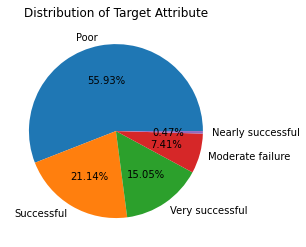

Number of records in each bin:
0    211796
3     80043
4     56999
1     28041
2      1782
Name: percent_raised_category, dtype: int64


In [11]:
# Bin based on the arbitrarily defined categories above
def bin_custom(percent_raised):
    if percent_raised < .25:
        return 0
    elif percent_raised >= .25 and percent_raised < .75:
        return 1
    elif percent_raised >= .75 and percent_raised < 1:
        return 2
    elif percent_raised >= 1 and percent_raised < 1.25:
        return 3
    elif percent_raised >= 1.25:
        return 4

ks_dataframe["percent_raised_category"] = ks_dataframe["percent_goal_raised"].to_numpy(copy=True)
ks_dataframe["percent_raised_category"] = ks_dataframe["percent_raised_category"].apply(bin_custom)

counts = ks_dataframe["percent_raised_category"].value_counts()
plt.pie(counts.values, labels=["Poor", "Successful", "Very successful", "Moderate failure", "Nearly successful"], autopct="%1.2f%%", normalize=True)
plt.title("Distribution of Target Attribute")
plt.show()
print("Number of records in each bin:")
print(counts)

## 1.4 Record Filtering

In [12]:
# Filter out entries with a goal of less than 10 USD -- these are outliers (and many are jokes), and so 
# they shouldn't be used in our classifier
ks_dataframe = ks_dataframe.loc[ks_dataframe["usd_goal_real"] >= 10]
print(ks_dataframe.shape)

(377882, 19)


In [13]:
# Remove "live" state records -- we shouldn't use them because we don't have information to predict
# how successful they are, because their fundraising is not completed
ks_dataframe = ks_dataframe.loc[ks_dataframe["state"] != "live"]
print(ks_dataframe.shape)

(375090, 19)


In [14]:
# Filter out records with meaningless names
ks_dataframe = ks_dataframe.loc[(ks_dataframe["name"] != "Cancelled (Canceled)") 
    & (ks_dataframe["name"] != "Canceled (Canceled)")
    & (ks_dataframe["name"] != "Project (Canceled)")
    & (ks_dataframe["name"] != "N/A (Canceled)")
    & (ks_dataframe["name"] != "n/a (Canceled)")
    & (ks_dataframe["name"] != "(Canceled)")
    & (ks_dataframe["name"] != "cancelled (Canceled)")
    & (ks_dataframe["name"] != "Project Canceled (Canceled)")
    & (ks_dataframe["name"] != "Test (Canceled)")
    & (ks_dataframe["name"] != "Closed (Canceled)")]

print(ks_dataframe.shape)

(375028, 19)


In [15]:
# Filter out records with a run time greater than the max allowed -- created because some records
# have an erroneous launch date
ks_dataframe = ks_dataframe.loc[ks_dataframe["run_time (days)"] <= 90]
print(ks_dataframe.shape)

(374999, 19)


## 1.5 Attribute Transformation

In [16]:
# Remove " (Canceled)" suffix from record names -- this will contaminate the results of the name
# classifier later if left

# Examine the data before cleaning
ks_dataframe.loc[ks_dataframe["state"] == "canceled"]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledged_vs_goal,percent_goal_raised,run_time (days),percent_raised_category
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,-18217.00,0.065795,55,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,-116767.00,0.065864,34,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,-58759.43,0.096009,29,0
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14,-10931.05,0.046667,29,0
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,-84970.00,0.023333,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378640,999893629,Ciridian Helix (Canceled),Fiction,Publishing,USD,2014-09-11,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US,100.00,100.00,1000.00,-900.00,0.100000,33,0
378643,999931480,Google Glass Shield (Canceled),3D Printing,Technology,USD,2014-05-26,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US,0.00,0.00,6500.00,-6500.00,0.000000,20,0
378648,999955533,Cards and Chit Network Season 2! (Canceled),Tabletop Games,Games,USD,2016-02-23,500.0,2016-01-24 16:03:27,121.00,canceled,5,US,121.00,121.00,500.00,-379.00,0.242000,29,0
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.00,canceled,0,CA,0.00,0.00,4949.60,-4949.60,0.000000,44,0


In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'ve', "won't", 'doing', "isn't", "you'll", 'such', 'haven', "mustn't", "weren't", "it's", 'herself', 'do', 'here', 'i', 'than', 'her', 'was', 'me', "you're", "couldn't", 'these', "doesn't", 'itself', 'out', 'what', 'other', 'after', 'only', 'd', 'each', 's', 'she', 'until', 'too', 'over', "wasn't", 'll', 'had', 'very', 'o', 'whom', 'of', 'he', 'won', 'weren', 'again', 'ain', 'ourselves', 'or', 'when', 'its', 'but', 'any', 'mustn', 'once', 'theirs', "needn't", 'm', 'for', 'more', 'yourself', 'you', 'during', 'does', 'before', 'by', 'didn', 'been', 'own', 'themselves', 'hasn', 'having', 'ours', 'your', 're', 'they', 'which', 'yours', 'it', 'no', "she's", "mightn't", 'few', 'hadn', 'the', 'between', 'we', 'to', 'isn', 'that', 'mightn', 'against', 'why', 'myself', 'their', 'himself', "hadn't", "haven't", "shan't", 'above', "you've", 'down', 'him', 'nor', 'as', 'about', 'all', 'from', 'can', 'there', 'doesn', "wouldn't", 'hers', 'ma', "you'd", 'some', 'yourselves', 'while', "don't", 'being

[nltk_data] Downloading package stopwords to /home/gavin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import gensim

# Remove the suffix " (Canceled)" from the name of records, convert to a list of
# lowercase tokens, and remove any stopwords
def clean_names(name):
    name = str(name)
    if name.endswith(" (Canceled)"):
        name = name[:-len(" (Canceled)")]
    
    tokens = gensim.utils.simple_preprocess(name, deacc=False, min_len=1)
    return [token for token in tokens if not token in stop_words]

# Apply the cleaning to each row's name column
ks_dataframe["name"] = ks_dataframe["name"].apply(clean_names)
# Examine data after cleaning
ks_dataframe.loc[ks_dataframe["state"] == "canceled"]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledged_vs_goal,percent_goal_raised,run_time (days),percent_raised_category
4,1000011046,"[community, film, project, art, neighborhood, ...",Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,-18217.00,0.065795,55,0
8,1000034518,"[spin, premium, retractable, ear, headphones, ...",Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,-116767.00,0.065864,34,0
9,100004195,"[studio, sky, documentary, feature, film]",Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,-58759.43,0.096009,29,0
68,1000256760,"[raise, woof, expanding, love]",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14,-10931.05,0.046667,29,0
70,1000260691,"[gizbee, unlimited, removable, storage, travel...",Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,-84970.00,0.023333,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378640,999893629,"[ciridian, helix]",Fiction,Publishing,USD,2014-09-11,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US,100.00,100.00,1000.00,-900.00,0.100000,33,0
378643,999931480,"[google, glass, shield]",3D Printing,Technology,USD,2014-05-26,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US,0.00,0.00,6500.00,-6500.00,0.000000,20,0
378648,999955533,"[cards, chit, network, season]",Tabletop Games,Games,USD,2016-02-23,500.0,2016-01-24 16:03:27,121.00,canceled,5,US,121.00,121.00,500.00,-379.00,0.242000,29,0
378655,999976312,"[angela, poetry]",Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.00,canceled,0,CA,0.00,0.00,4949.60,-4949.60,0.000000,44,0


In [19]:
# Remove entries with no name
ks_dataframe = ks_dataframe[ks_dataframe["name"].astype(bool)]
ks_dataframe.shape

(374281, 19)

## 1.6 Feature Reduction

Question: should we drop the "backers" attribute from the dataset?

Concern: "backers" is the only attribute that has data from once the project has been started; every other attribute is decided at the time of start of the project. We should decide on our objective: deciding the success of the project before it's started (to allow changes that might make it more successful), or decide if it will succeed once it is going on.

If we keep backers in the dataset, in the real world, it would also have access to the amount pledged: does it make sense to keep backers but not amount pledged? If we keep amount pledged as well, does that make classification too trivial? If we remove backers, are there not enough attributes (6, minus name) to predict on?

Removed live state records because we don't have data to classify them as what category they raised

Possible solutions: create boolean flag for hasBackers?



In [20]:
## Remove unneeded attributes after transormation/feature creation
# deadline and launched removed because run_time takes their place
# goal, pledged, and usd pledged removed in favor of the more accurate usd_goal_real and usd_pledged_real attributes
# ID removed because it contributes no information
# state removed because percent_raised_category takes its place in terms of representing success
# usd_pledged_real, pledged_vs_goal, and percent_goal_raised removed because percent_raised_category encapsulates each
ks_dataframe = ks_dataframe.drop(columns=["deadline", "launched", "goal", "ID", "pledged", "state", "usd pledged", "usd_pledged_real", "pledged_vs_goal", "percent_goal_raised"])
ks_dataframe.head()

,name,category,main_category,currency,backers,country,usd_goal_real,run_time (days),percent_raised_category
0,"[songs, adelaide, abullah]",Poetry,Publishing,GBP,0,GB,1533.95,58,0
1,"[greeting, earth, zgac, arts, capsule, et]",Narrative Film,Film & Video,USD,15,US,30000.00,59,0
2,[hank],Narrative Film,Film & Video,USD,3,US,45000.00,44,0
3,"[toshicapital, rekordz, needs, help, complete,...",Music,Music,USD,1,US,5000.00,29,0
4,"[community, film, project, art, neighborhood, ...",Film & Video,Film & Video,USD,14,US,19500.00,55,0


# 2 Model Training

## 2.1 Split into Train/Test Datasets

In [21]:
from sklearn.model_selection import train_test_split

# Split into train and test partition with test at 25% size of dataset, with the same proportion of classes
# in the partitions as that in the whole dataset
ks_train, ks_test = train_test_split(ks_dataframe, stratify=ks_dataframe.iloc[:, -1], test_size=.25, random_state=1)
ks_train.head()

,name,category,main_category,currency,backers,country,usd_goal_real,run_time (days),percent_raised_category
262203,"[solar, escape]",Video Games,Games,EUR,1,DE,554.20,29,0
256528,"[christmas, tshirt, custom, gifts, customize, ...",Apparel,Fashion,USD,1,US,500.00,29,0
73118,"[velociprint, show]",Mixed Media,Art,USD,26,US,850.00,19,3
310298,"[tarot, fundamentals]",Art Books,Publishing,GBP,1031,GB,7592.09,29,4
10518,"[wildly, silver]",Taxidermy,Crafts,USD,1,US,5464.00,29,0


## 2.2 Doc2Vec

### 2.2.1 Create Tagged Documents

In [22]:
from gensim.models.doc2vec import TaggedDocument

# Create a TaggedDocument from each record in the training dataset, tagging it with the target
# category and its dataframe id
train_documents = ks_train.apply(lambda p: TaggedDocument(p["name"], tags=[p.name, p["percent_raised_category"]]), axis=1)

# Create a TaggedDocument from each record in the test dataset, tagging it with only its dataframe id
test_documents = ks_test.apply(lambda p: TaggedDocument(p["name"], tags=[p.name]), axis=1)

train_documents.iloc[0]

TaggedDocument(words=['solar', 'escape'], tags=[262203, 0])

### 2.2.2 Create Doc2Vec Model

In [23]:
from gensim.models.doc2vec import Doc2Vec

# Create Doc2Vec model using distributed memory (DM)
doc_dm_model = Doc2Vec(dm=1, min_count=2, epochs=20, vector_size=150)
# Create Doc2Vec model using distributed bag of words (DBOW)
doc_dbow_model = Doc2Vec(dm=0, min_count=2, epochs=20, vector_size=150)

### 2.2.3 Build Vocabulary

In [24]:
# Build vocabulary of unique words from the training documents
doc_dm_model.build_vocab(train_documents.values)
doc_dbow_model.build_vocab(train_documents.values)

### 2.2.4 Train Doc2Vec

In [27]:
# Create cache directory (if it doesn't exist) to save model and learned vectors
Path("./cached").mkdir(exist_ok=True)

In [ ]:
# Update models' neural weights

# If saved versions of the trained models exist, load them instead of retraining
if os.path.exists("./cached/doc_dm_model") and os.path.exists("./cached/doc_dbow_model"):
    doc_dm_model = Doc2Vec.load("./cached/doc_dm_model")
    doc_dbow_model = Doc2Vec.load("./cached/doc_dbow_model")
else:
    doc_dm_model.train(train_documents.values, total_examples=doc_dm_model.corpus_count, epochs=doc_dm_model.epochs)
    doc_dbow_model.train(train_documents.values, total_examples=doc_dbow_model.corpus_count, epochs=doc_dbow_model.epochs)

In [ ]:
# Save the models, if cached versions of them don't already exist
if not (os.path.exists("./cached/doc_dm_model") and os.path.exists("./cached/doc_dbow_model")):
    doc_dm_model.save("./cached/doc_dm_model")
    doc_dbow_model.save("./cached/doc_dbow_model")

### 2.2.5 Build Feature Vectors for Training and Test Documents

In [ ]:
# Concatenate the feature vectors produced by the distributed memory and distributed bag of words
# models for better accuracy, as described in https://arxiv.org/abs/1405.4053
# Based on similar implementation in https://github.com/RaRe-Technologies/gensim/blob/2024be9053094fbb2e765b9a06b9dc580f55c505/gensim/test/test_doc2vec.py#L516
def infer_dual_vector(dm_model, dbow_model, words):
    return np.concatenate([model.infer_vector(words) for model in [dm_model, dbow_model]])

In [29]:
# Load the feature vectors for the training and test documents if they were cached, else infer them
if os.path.exists("./cached/train_vectors"):
    train_vectors = pd.read_pickle("./cached/train_vectors")
else:
    train_vectors = train_documents.apply(lambda d: infer_dual_vector(doc_dm_model, doc_dbow_model, d.words))
train_targets = ks_train.iloc[:, -1]

if os.path.exists("./cached/test_vectors"):
    test_vectors = pd.read_pickle("./cached/test_vectors")
else:
    test_vectors = test_documents.apply(lambda d: infer_dual_vector(doc_dm_model, doc_dbow_model, d.words))
test_targets = ks_test.iloc[:, -1]

In [ ]:
# Save the feature vectors, if cached versions of them don't already exist
if not (os.path.exists("./cached/train_vectors") and os.path.exists("./cached/test_vectors")):
    train_vectors.to_pickle("./cached/train_vectors")
    test_vectors.to_pickle("./cached/test_vectors")

## 2.3 Logistic Regression Classifier

### 2.3.1 Create LogisticRegression Model

In [30]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

# C value was determined using LogisticRegressionCV with Cs=10
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, C=0.35938137)
# logreg_model = LogisticRegressionCV(multi_class='multinomial', solver='lbfgs', max_iter=10000, Cs=10)

Here, the C value for the LogisticRegression model was determined by running LogisticRegressionCV with 
10 possible C values, and performing its integrated cross-validation. The C value with the best performance was retained, and input into the LogisticRegression model. LogisticRegressionCV has been commented out because of performance considerations.

### 2.3.2 Train LogisticRegression

In [31]:
# reshaped_train_vecs = np.concatenate(train_vectors.values).reshape(len(train_vectors), len(train_vectors.values[0]))
# logreg_model.fit(reshaped_train_vecs, train_targets.values)
logreg_model.fit(np.concatenate(train_vectors.values).reshape(len(train_vectors), len(train_vectors.values[0])), train_targets.values)

LogisticRegression(C=0.35938137, max_iter=10000, multi_class='multinomial')

### 2.3.3 Test LogisticRegression Predictions

In [105]:
reshaped_test_vecs = np.concatenate(test_vectors.values).reshape(len(test_vectors), len(test_vectors.values[0]))

y_pred = logreg_model.predict(reshaped_test_vecs)
score = logreg_model.score(reshaped_test_vecs, test_targets.values)

Accuracy: 0.5502666424426371
Balanced accuracy:  0.2623426752673522
Weighted F1 score: 0.502737333310703
Confusion Matrix:
[[43493   942    14  5209  2631]
 [ 4926   194     2   945   827]
 [  288    23     0    48    67]
 [12813   480     5  4942  1692]
 [ 8492   494     9  2175  2860]]
Class F1 scores:  [0.71124521 0.04298216 0.         0.29725422 0.25874158]


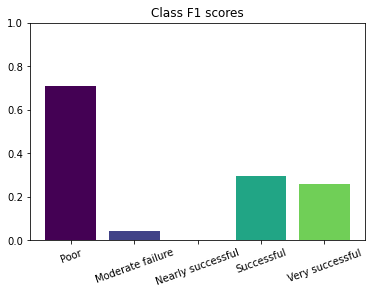

In [106]:
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix

print("Accuracy: %s" % score)
print("Balanced accuracy: ", balanced_accuracy_score(test_targets.values, y_pred))
print("Weighted F1 score: {}".format(f1_score(test_targets.values, y_pred, average="weighted")))

logreg_conf_matrix = confusion_matrix(test_targets.values, y_pred)
print("Confusion Matrix:")
print(logreg_conf_matrix)

class_f1s = f1_score(test_targets.values, y_pred, average=None)
print("Class F1 scores: ", class_f1s)

cmap = plt.cm.get_cmap("viridis")
tick_labels = ["Poor", "Moderate failure", "Nearly successful", "Successful", "Very successful"]
fig, ax = plt.subplots()
ax.set_ylim([0,1.0])
ax.bar(range(0, 5, 1), class_f1s, color=cmap(range(0, 250, 50)), tick_label=tick_labels)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.title("Class F1 scores")
plt.show()

In [107]:
# Group together the "failures" (Poor, Moderate Failure, Nearly Successful),
# and group together the "successes" (Successful, Very Successful),
# so a more general accuracy score can be generated based solely on "Failure vs Success" predictions

# Any instance with a "target" of 2 or less is a "failure" (encompasses Poor-Nearly Successful)
#actual_failures = test_targets.loc[test_targets <= 2]
# Any instance with a "target" of 3 or more is a "success" (encompasses Successful-Very Successful)
#actual_successes = test_targets.loc[test_targets > 2]

#predicted_failures = y_pred.loc[y_pred <= 2]
#predicted_successes = y_pred.loc[y_pred > 2]

# Split the confusion matrix into more general categories of "Success" vs "Failure"
# Defining "Positive" as Success, and "Negative" as Failure, for the confusion matrix
# 0 1 2 | 3 4
# 1  TN |  FP
# 2     |
#---------------
# 3  FN |  TP
# 4     |

true_negatives = logreg_conf_matrix[0:3, 0:3].sum()
false_positives = logreg_conf_matrix[0:3, 3:].sum()
false_negatives = logreg_conf_matrix[3:, 0:3].sum()
true_positives = logreg_conf_matrix[3:, 3:].sum()

fail_success_precision = true_positives / (true_positives + false_positives)
fail_success_recall = true_positives / (true_positives + false_negatives)
fail_success_f1 = (2 * fail_success_precision * fail_success_recall) / (fail_success_precision + fail_success_recall)
print("Combined precision: ", fail_success_precision)
print("Combined recall: ", fail_success_recall)
print("Combined accuracy: ", (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives))
print("Combined f1: ", fail_success_f1)

Combined precision:  0.5453823144512993
Combined recall:  0.34358989458806904
Combined accuracy:  0.6577999593891269
Combined f1:  0.421583149680263


## 2.4 Linear Support Vector Classifier

### 2.4.1 Create Linear SVC

In [ ]:
# from sklearn.svm import LinearSVC

# svc_model = LinearSVC(max_iter=10000)

### 2.4.2 Train Linear SVC

In [ ]:
# svc_model.fit(reshaped_train_vecs, train_targets.values)

### 2.4.3 Test LinearSVC Predictions

In [ ]:
# y_pred = svc_model.predict(reshaped_test_vecs)
# score = svc_model.score(reshaped_test_vecs, test_targets.values)

In [ ]:
# print("Accuracy: %s" % score)
# print("Balanced accuracy: ", balanced_accuracy_score(test_targets.values, y_pred))
# print("Weighted F1 score: {}".format(f1_score(test_targets.values, y_pred, average="weighted")))

# svc_conf_matrix = confusion_matrix(test_targets.values, y_pred)
# print("Confusion Matrix:")
# print(svc_conf_matrix)

# class_f1s = f1_score(test_targets.values, y_pred, average=None)
# print("Class F1 scores: ", class_f1s)
# plt.bar(range(5), class_f1s, tick_label=["Poor", "Moderate failure", "Nearly successful", "Successful", "Very successful"])
# plt.title("Class F1 scores")
# plt.show()

The accuracy of the linear support vector classifier is comparable to that of the logistic regression classifier, with weighted F1 scores within 0.01% of each other (.50269 for logreg, .50118 for SVC). The SVC model creation and training has been commented out for performance.

## 2.5 Multi-Layer Perceptron

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam

### Preprocessing Training Data

In [62]:
mlp_train = ks_train
mlp_train = mlp_train.sample(frac=1,random_state=4)

mlp_train = mlp_train.rename(columns={'run_time (days)': 'run_time'})
#del mlp_train['category']

#Label Encoding for Main_Categories
mlp_train['main_category'] = mlp_train['main_category'].astype('category')
mlp_train['main_category'] = mlp_train['main_category'].cat.codes

#Label Encoding for Currency 
mlp_train['currency'] = mlp_train['currency'].astype('category')
mlp_train['currency'] = mlp_train['currency'].cat.codes

#Label Encoding for Country
mlp_train['country'] = mlp_train['country'].astype('category')
mlp_train['country'] = mlp_train['country'].cat.codes

#Label Encoding for Category
mlp_train['category'] = mlp_train['category'].astype('category')
mlp_train['category'] = mlp_train['category'].cat.codes

df = mlp_train.loc[mlp_train['percent_raised_category'] == 0].sample(n=80000,random_state=42)

mlp_train = mlp_train[mlp_train.percent_raised_category != 0]

mlp_train = pd.concat([df, mlp_train])

X = mlp_train[['category', 'main_category', 'currency', 'country', 'usd_goal_real', 'run_time']].astype(float)

### Preprocessing Test Data

In [54]:
mlp_test = ks_test
mlp_test = mlp_test.rename(columns={'run_time (days)': 'run_time'})
#del mlp_test['category']

#Label Encoding for Main_Categories
mlp_test['main_category'] = mlp_test['main_category'].astype('category')
mlp_test['main_category'] = mlp_test['main_category'].cat.codes

#Label Encoding for Currency 
mlp_test['currency'] = mlp_test['currency'].astype('category')
mlp_test['currency'] = mlp_test['currency'].cat.codes

#Label Encoding for Country
mlp_test['country'] = mlp_test['country'].astype('category')
mlp_test['country'] = mlp_test['country'].cat.codes

#Label Encoding for Category
mlp_test['category'] = mlp_test['category'].astype('category')
mlp_test['category'] = mlp_test['category'].cat.codes


X_test = mlp_test[['category', 'main_category', 'currency', 'country', 'usd_goal_real', 'run_time']]

### Label-Encoding Predictions For Training Data

In [63]:
y = mlp_train['percent_raised_category']
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
y = np_utils.to_categorical(encoded_y)

### Label-Encoding for Predictions for Test Data

In [55]:
y_test = mlp_test['percent_raised_category']
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_y = encoder.transform(y_test)
y_test = np_utils.to_categorical(encoded_y)

### Creating Model

In [64]:
def baseline_model():
    model = Sequential()
    model.add(Dense(12, input_dim=6, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.0001), metrics=['accuracy'])
    return model

In [65]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=40, batch_size=16, verbose=0)

### Fitting the Model

In [66]:
estimator.fit(X,y)

### Generating Baseline Predictions

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Generating Predictions

In [67]:
y_true = mlp_test['percent_raised_category']
y_test = y_true
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_y = encoder.transform(y_test)
y_test = np_utils.to_categorical(encoded_y)

In [68]:
from sklearn.metrics import classification_report
import keras

y_pred = estimator.predict(X_test)

y_prob = estimator.predict_proba(X_test)

score = estimator.score(X_test, y_test)

y_true = mlp_test['percent_raised_category']

print("Test F1 score: {}".format(f1_score(y_true, y_pred, average="weighted")))
print(classification_report(y_true, y_pred, labels = [0,1,2,3,4]))

/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Test F1 score: 0.45978075282867975
              precision    recall  f1-score   support

           0       0.63      0.69      0.66     52289
           1       0.10      0.00      0.00      6894
           2       0.00      0.00      0.00       426
           3       0.28      0.47      0.35     19932
           4       0.31      0.07      0.12     14030

    accuracy                           0.49     93571
   macro avg       0.26      0.25      0.23     93571
weighted avg       0.47      0.49      0.46     93571



/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 0.49343279004096985
Balanced accuracy:  0.24541956375530458
Weighted F1 score: 0.45978075282867975
Confusion Matrix:
[[35826    65     0 15047  1351]
 [ 4044    15     0  2581   254]
 [  285     0     0   127    14]
 [ 9938    20     0  9311   663]
 [ 6558    56     0  6397  1019]]
Class F1 scores:  [0.65771985 0.00425532 0.         0.34875925 0.11759275]


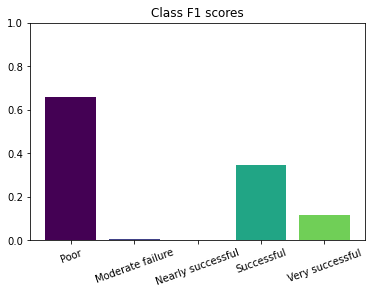

In [108]:
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix

mlp_pred = estimator.predict(X_test)
mlp_score = estimator.score(X_test, y_test)

print("Accuracy: %s" % mlp_score)
print("Balanced accuracy: ", balanced_accuracy_score(mlp_test['percent_raised_category'], mlp_pred))
print("Weighted F1 score: {}".format(f1_score(mlp_test['percent_raised_category'], mlp_pred, average="weighted")))

mlp_conf_matrix = confusion_matrix(mlp_test['percent_raised_category'], mlp_pred)
print("Confusion Matrix:")
print(mlp_conf_matrix)

class_f1s = f1_score(mlp_test['percent_raised_category'], mlp_pred, average=None)
print("Class F1 scores: ", class_f1s)

cmap = plt.cm.get_cmap("viridis")
tick_labels = ["Poor", "Moderate failure", "Nearly successful", "Successful", "Very successful"]
fig, ax = plt.subplots()
ax.set_ylim([0,1.0])
ax.bar(range(0, 5, 1), class_f1s, color=cmap(range(0, 250, 50)), tick_label=tick_labels)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.title("Class F1 scores")
plt.show()

In [109]:
true_negatives = mlp_conf_matrix[0:3, 0:3].sum()
false_positives = mlp_conf_matrix[0:3, 3:].sum()
false_negatives = mlp_conf_matrix[3:, 0:3].sum()
true_positives = mlp_conf_matrix[3:, 3:].sum()

fail_success_precision = true_positives / (true_positives + false_positives)
fail_success_recall = true_positives / (true_positives + false_negatives)
fail_success_f1 = (2 * fail_success_precision * fail_success_recall) / (fail_success_precision + fail_success_recall)
print("Combined precision: ", fail_success_precision)
print("Combined recall: ", fail_success_recall)
print("Combined accuracy: ", (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives))
print("Combined f1: ", fail_success_f1)

Combined precision:  0.47301708192797304
Combined recall:  0.5120428714445556
Combined accuracy:  0.6158425153092304
Combined f1:  0.4917569210757006


# 3 Ensemble Classification

## 3.1 StackingClassifier

### 3.1.1 Create Doc2Vec Transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class Doc2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.doc_dm_model = Doc2Vec(dm=1, min_count=2, epochs=20, vector_size=150)
        self.doc_dbow_model = Doc2Vec(dm=0, min_count=2, epochs=20, vector_size=150)

    def fit(self, X, y=None):
        X_ = X.copy()
        documents = X_.apply(lambda p: TaggedDocument(p["name"], tags=[p.name]), axis=1)

        self.doc_dm_model.build_vocab(documents.values)
        self.doc_dbow_model.build_vocab(documents.values)
        
        self.doc_dm_model.train(documents.values, total_examples=self.doc_dm_model.corpus_count, epochs=self.doc_dm_model.epochs)
        self.doc_dbow_model.train(documents.values, total_examples=self.doc_dbow_model.corpus_count, epochs=self.doc_dbow_model.epochs)
        return self

    def infer_dual_vector(self, words):
        return np.concatenate([model.infer_vector(words) for model in [self.doc_dm_model, self.doc_dbow_model]])

    def transform(self, X, y=None):
        X_ = X.copy()
        vectors = X_.apply(lambda d: self.infer_dual_vector(d["name"]), axis=1)
        return np.concatenate(vectors.values).reshape(len(vectors), len(vectors.values[0]))

### 3.1.2 Create MLPPreprocess

In [ ]:
class MLPPreprocess(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # X_ = X.sample(frac=1,random_state=4)
        X_ = X.copy()

        #Label Encoding for Main_Categories
        X_['main_category'] = X_['main_category'].astype('category')
        X_['main_category'] = X_['main_category'].cat.codes

        #Label Encoding for Currency 
        X_['currency'] = X_['currency'].astype('category')
        X_['currency'] = X_['currency'].cat.codes

        #Label Encoding for Country
        X_['country'] = X_['country'].astype('category')
        X_['country'] = X_['country'].cat.codes

        #Label Encoding for Category
        X_['category'] = X_['category'].astype('category')
        X_['category'] = X_['category'].cat.codes

        X_ = X_[['category', 'main_category', 'currency', 'country', 'usd_goal_real', 'run_time (days)']].astype(float)
        return X_


### 3.1.3 Create MLPTargetTransformer

In [ ]:
from mlinsights.mlmodel import TransformedTargetClassifier2
from mlinsights.mlmodel.sklearn_transform_inv import BaseReciprocalTransformer

# class MLPTargetTransformer(BaseReciprocalTransformer):
#     def fit(self, target):
#         return self
    
#     def transform(self, target):
#         encoder = LabelEncoder()
#         encoder.fit(target)
#         target_ = target.copy()
#         encoded_y = encoder.transform(target_)
#         target_ = np_utils.to_categorical(target_)
#         return target_
    
#     def inverse_transform(self, target):
#         # Transformation back to label encoding is done by the MLP classifier itself
#         return target

class MLPTargetTransformer(BaseReciprocalTransformer):
    def __init__(self, fct, fct_inv=None):
        BaseReciprocalTransformer.__init__(self)
        self.fct = fct
        self.fct_inv = fct_inv
    
    def fit(self, target, sample_weight=None):
        return self
    
    def transform(self, X, y):
        if self.fct is None:
            return X, y
        return X, self.fct(y)
    
    def get_fct_inv(self):
        return MLPTargetTransformer(self.fct_inv, self.fct)
    

def categorical_encode(y):
        encoder = LabelEncoder()
        encoder.fit(y)
        y_ = y.copy()
        encoded_y = encoder.transform(y_)
        y_ = np_utils.to_categorical(y_)
        return y_

### 3.1.4 Create Pipelines for LogisticRegression and MLP

In [ ]:
from sklearn.pipeline import Pipeline

logreg_pipeline = Pipeline(steps=[("doc2vec", Doc2VecTransformer()), ("logreg", LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, C=0.35938137))])
mlp_pipeline = Pipeline(steps=[("preprocess", MLPPreprocess()), ("mlp", KerasClassifier(build_fn=baseline_model, epochs=40, batch_size=16, verbose=0))])

tt_mlp_estimator = TransformedTargetClassifier2(classifier=mlp_pipeline, transformer=MLPTargetTransformer(categorical_encode, None))

### 3.1.5 Create StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("logreg", logreg_pipeline),
    ("mlp", tt_mlp_estimator)
]
stacked_model = StackingClassifier(estimators, cv=2)

### 3.1.6 Train StackingClassifier

In [ ]:
# Undersampling for better MLP accuracy
df = ks_train.loc[ks_train['percent_raised_category'] == 0].sample(n=80000,random_state=42)
X_train_concat = ks_train[ks_train.percent_raised_category != 0]
X_train_concat = pd.concat([df, X_train_concat])

y_train = X_train_concat.iloc[:, -1].values
y_test = ks_test.iloc[:, -1].values

stacked_model.fit(X_train_concat, y_train)

In [ ]:
# test_pred = logreg_pipeline.fit(ks_train, ks_train.iloc[:, -1].values).predict(ks_test)

In [ ]:
# from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix

# print("Weighted F1 score: {}".format(f1_score(ks_test.iloc[:, -1].values, test_pred, average="weighted")))

# logreg_conf_matrix = confusion_matrix(ks_test.iloc[:, -1].values, test_pred)
# print("Confusion Matrix:")
# print(logreg_conf_matrix)

# class_f1s = f1_score(ks_test.iloc[:, -1].values, test_pred, average=None)
# print("Class F1 scores: ", class_f1s)

# cmap = plt.cm.get_cmap("viridis")
# tick_labels = ["Poor", "Moderate failure", "Nearly successful", "Successful", "Very successful"]
# fig, ax = plt.subplots()
# ax.bar(range(0, 5, 1), class_f1s, color=cmap(range(0, 250, 50)), tick_label=tick_labels)
# plt.setp(ax.get_xticklabels(), rotation=20)
# plt.title("Class F1 scores")
# plt.show()

## 3.2 Weighted Probability Averaging

### 3.2.1 Create Functions for Weighted Probability Averaging

In [38]:
def preprocess_for_mlp(X):
    mlp_test = X
    mlp_test = mlp_test.rename(columns={'run_time (days)': 'run_time'})

    #Label Encoding for Main_Categories
    mlp_test['main_category'] = mlp_test['main_category'].astype('category')
    mlp_test['main_category'] = mlp_test['main_category'].cat.codes

    #Label Encoding for Currency 
    mlp_test['currency'] = mlp_test['currency'].astype('category')
    mlp_test['currency'] = mlp_test['currency'].cat.codes

    #Label Encoding for Country
    mlp_test['country'] = mlp_test['country'].astype('category')
    mlp_test['country'] = mlp_test['country'].cat.codes

    #Label Encoding for Category
    mlp_test['category'] = mlp_test['category'].astype('category')
    mlp_test['category'] = mlp_test['category'].cat.codes

    return mlp_test[['category', 'main_category', 'currency', 'country', 'usd_goal_real', 'run_time']]

In [50]:
def weighted_probability_average(logreg_model, logreg_weight, mlp_model, mlp_weight, X, d2v_vecs=None):
    if d2v_vecs is None:
        d2v_vecs = X.apply(lambda d: infer_dual_vector(doc_dm_model, doc_dbow_model, d["name"]), axis=1)
        
    reshaped_d2v_vecs = np.concatenate(d2v_vecs.values).reshape(len(d2v_vecs), len(d2v_vecs.values[0]))
    logreg_probs = logreg_model.predict_proba(reshaped_d2v_vecs)
    
    mlp_probs = mlp_model.predict_proba(preprocess_for_mlp(X))
    
    weighted_probs = (logreg_probs * logreg_weight) + (mlp_probs * mlp_weight)
    weighted_pred = np.argmax(weighted_probs, axis=1)
    return weighted_pred

### 3.2.2 Test Weighted Probability Average Predictions

/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy: 0.5759156148806789
Balanced accuracy:  0.259952139523571
Weighted F1 score: 0.5077795628966485
Confusion Matrix:
[[46640    70     0  4393  1186]
 [ 5496    18     0   946   434]
 [  342     1     0    45    38]
 [13671    59     0  5222   980]
 [ 9255    64     2  2700  2009]]
Class F1 scores:  [0.73050206 0.00506614 0.         0.31421867 0.21513091]


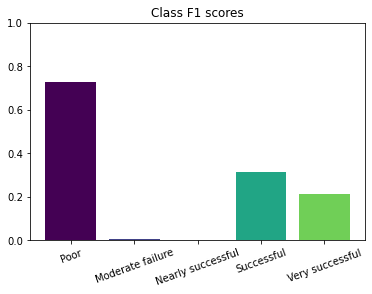

In [110]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, confusion_matrix

wpa_pred = weighted_probability_average(logreg_model, .4, estimator, .6, ks_test, d2v_vecs=test_vectors)

print("Accuracy: %s" % accuracy_score(ks_test.iloc[:, -1].values, wpa_pred))
print("Balanced accuracy: ", balanced_accuracy_score(ks_test.iloc[:, -1].values, wpa_pred))
print("Weighted F1 score: {}".format(f1_score(ks_test.iloc[:, -1].values, wpa_pred, average="weighted")))

conf_matrix = confusion_matrix(ks_test.iloc[:, -1].values, wpa_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_f1s = f1_score(ks_test.iloc[:, -1].values, wpa_pred, average=None)
print("Class F1 scores: ", class_f1s)

cmap = plt.cm.get_cmap("viridis")
tick_labels = ["Poor", "Moderate failure", "Nearly successful", "Successful", "Very successful"]
fig, ax = plt.subplots()
ax.set_ylim([0,1.0])
ax.bar(range(0, 5, 1), class_f1s, color=cmap(range(0, 250, 50)), tick_label=tick_labels)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.title("Class F1 scores")
plt.show()

In [111]:
true_negatives = conf_matrix[0:3, 0:3].sum()
false_positives = conf_matrix[0:3, 3:].sum()
false_negatives = conf_matrix[3:, 0:3].sum()
true_positives = conf_matrix[3:, 3:].sum()

fail_success_precision = true_positives / (true_positives + false_positives)
fail_success_recall = true_positives / (true_positives + false_negatives)
fail_success_f1 = (2 * fail_success_precision * fail_success_recall) / (fail_success_precision + fail_success_recall)
print("Combined precision: ", fail_success_precision)
print("Combined recall: ", fail_success_recall)
print("Combined accuracy: ", (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives))
print("Combined f1: ", fail_success_f1)

Combined precision:  0.6077535787890603
Combined recall:  0.32127083210647195
Combined accuracy:  0.6783939468425046
Combined f1:  0.4203409419242993


### 3.2.3 Find Best Weights

In [81]:
best_score = 0
best_weights = {"logreg": 0, "mlp": 0}

for weight in np.arange(0.05, 0.95, 0.05):
    wpa_pred = weighted_probability_average(logreg_model, weight, estimator, 1 - weight, ks_test, d2v_vecs=test_vectors)
    score = f1_score(ks_test.iloc[:, -1].values, wpa_pred, average="weighted")
    if score > best_score:
        best_score = score
        best_weights = {"logreg": weight, "mlp": 1 - weight}
        
print(best_score)
print(best_weights)

/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/seq

0.5099417461674078
{'logreg': 0.6000000000000001, 'mlp': 0.3999999999999999}


/home/gavin/anaconda3/envs/CSC_422/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Accuracy: 0.5732010986309861
Balanced accuracy:  0.2627333271763833
Weighted F1 score: 0.5099417461674078
Confusion Matrix:
[[46224   296     2  4182  1585]
 [ 5374    78     1   878   563]
 [  323     6     0    42    55]
 [13527   183     2  4943  1277]
 [ 9162   211     5  2262  2390]]
Class F1 scores:  [0.72851638 0.02034429 0.         0.30664723 0.24020101]


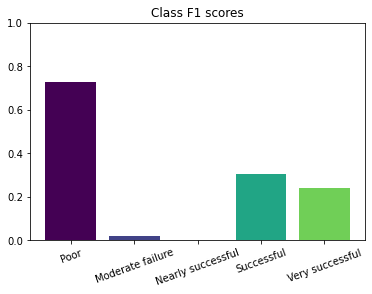

In [112]:
wpa_pred = weighted_probability_average(logreg_model, best_weights["logreg"], estimator, best_weights["mlp"], ks_test, d2v_vecs=test_vectors)

print("Accuracy: %s" % accuracy_score(ks_test.iloc[:, -1].values, wpa_pred))
print("Balanced accuracy: ", balanced_accuracy_score(ks_test.iloc[:, -1].values, wpa_pred))
print("Weighted F1 score: {}".format(f1_score(ks_test.iloc[:, -1].values, wpa_pred, average="weighted")))

conf_matrix = confusion_matrix(ks_test.iloc[:, -1].values, wpa_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_f1s = f1_score(ks_test.iloc[:, -1].values, wpa_pred, average=None)
print("Class F1 scores: ", class_f1s)

cmap = plt.cm.get_cmap("viridis")
tick_labels = ["Poor", "Moderate failure", "Nearly successful", "Successful", "Very successful"]
fig, ax = plt.subplots()
ax.set_ylim([0,1.0])
ax.bar(range(0, 5, 1), class_f1s, color=cmap(range(0, 250, 50)), tick_label=tick_labels)
plt.setp(ax.get_xticklabels(), rotation=20)
plt.title("Class F1 scores")
plt.show()

In [113]:
true_negatives = conf_matrix[0:3, 0:3].sum()
false_positives = conf_matrix[0:3, 3:].sum()
false_negatives = conf_matrix[3:, 0:3].sum()
true_positives = conf_matrix[3:, 3:].sum()

fail_success_precision = true_positives / (true_positives + false_positives)
fail_success_recall = true_positives / (true_positives + false_negatives)
fail_success_f1 = (2 * fail_success_precision * fail_success_recall) / (fail_success_precision + fail_success_recall)
print("Combined precision: ", fail_success_precision)
print("Combined recall: ", fail_success_recall)
print("Combined accuracy: ", (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives))
print("Combined f1: ", fail_success_f1)

Combined precision:  0.5981185014028718
Combined recall:  0.32012248984158764
Combined accuracy:  0.675166451144051
Combined f1:  0.4170390686434339


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c775a12-2787-4ec7-a6be-badd8b953eb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>